## Problem Statement

XYZ company provides subsidy to individuals. They have a large large data set for people geographical infomation, some financaial parameters, personal informations etc and their income bracket. Data is given in income.csv file. SO, the goal is to develop an classification syatem to predict income of individuals to provide subsidyies to them.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
#load file
data= pd.read_csv('income.csv')

In [8]:
#creating a copy of data
df=data.copy(deep=True)

In [9]:
# Exploring the data structures
df.head()

,age,JobType,EdType,maritalstatus,Occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   JobType        32561 non-null  object
 2   EdType         32561 non-null  object
 3   maritalstatus  32561 non-null  object
 4   Occupation     32561 non-null  object
 5   relationship   32561 non-null  object
 6   race           32561 non-null  object
 7   gender         32561 non-null  object
 8   capitalgain    32561 non-null  int64 
 9   capitalloss    32561 non-null  int64 
 10  hoursperweek   32561 non-null  int64 
 11  nativecountry  32561 non-null  object
 12  SalStat        32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [11]:
df.shape

(32561, 13)

In [13]:
#checking for null values
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
Occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

So, there is no null value present in the data

In [14]:
#summary of numerical variables
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


the capital gain mean is much higher than the capital loss, BUT it does not indicate any good informations as the Quartile values and median are Zero. The average hours per week is somewhrt closer to 40 hrs a week 

In [17]:
# Summary of Categorical variables
df.describe(include='O')

,JobType,EdType,maritalstatus,Occupation,relationship,race,gender,nativecountry,SalStat
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [18]:
#frequency of each category

df['JobType'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

So, in Job Type we have 1836 rows where the job type is not defined , marjed as ?

In [19]:
df['EdType'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: EdType, dtype: int64

No ? marked entries for Education type

In [20]:
df['maritalstatus'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

No ? marked entries for marital status

In [21]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Here again, for Occupation type 1843 entries are undefined

In [23]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

No ? marked entries for relationship

In [24]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

No ? entries for Race

In [25]:
df['gender'].value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

No ? entries for Gender

In [26]:
df['nativecountry'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

583 entries with un identified entries

In [27]:
df['SalStat'].value_counts()

 <=50K    24720
 >50K      7841
Name: SalStat, dtype: int64

SO, Salary state/ income status is defined as either less than equal to 50K or greater than 50K

Since a lot of rows have ? entries, it has to be replaced with NaN values. Reload the csv and replace the ? with Nan.

In [108]:
df=pd.read_csv('income.csv', na_values=[' ?'])

In [109]:
#Checking for null values
df.isnull().sum()

age                 0
JobType          1836
EdType              0
maritalstatus       0
Occupation       1843
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry     583
SalStat             0
dtype: int64

In [110]:
#HAndling of missing Data values
# Creating a subset with all the missing rows

missing= df[df.isnull().any(axis=1)]




In [111]:
missing

,age,JobType,EdType,maritalstatus,Occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,Some-college,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,7th-8th,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,Bachelors,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,Bachelors,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,Doctorate,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,HS-grad,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


SO, 1836 rows in Job Type , 1843 rows in Occupation and 583 rows in native country column are Nan entries. in tiotal 2399 rows of original data set have Nan entries.SO the next step is just to remove these rows from analysis set 

In [112]:
df2= df.dropna(axis=0)

In [113]:
df2.shape

(30162, 13)

In begining we had around 32561 rows entries , after removing the un idetified values , there are total 30162 rows with 13 columns

Now we have to check the correlation between independent variables if there is any

In [114]:
correlation= df2.corr()

In [115]:
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


we can see that the numerical columns do not have very high correlation among themselves. (Corr values are close to 0)

In [116]:
# Cross table check for Categorical data
df2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'Occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [117]:
#Jobtype vs Salstat

job_sal= pd.crosstab(index= df2['JobType'], columns=df2['SalStat'], margins= True, normalize= 'index')
job_sal


SalStat,<=50K,>50K
JobType,,
Federal-gov,0.612937,0.387063
Local-gov,0.705370,0.294630
Private,0.781208,0.218792
Self-emp-inc,0.441341,0.558659
Self-emp-not-inc,0.714286,0.285714
State-gov,0.731040,0.268960
Without-pay,1.000000,0.000000
All,0.751078,0.248922


Except for self employed peoples for all the kind of employed peoples more than half of them, the salary status is <=50K. also, about 75% peoples have salary <=50K

In [118]:
#Education type vs Salstat

ed_sal= pd.crosstab(index= df2['EdType'], columns=df2['SalStat'], margins= True, normalize= 'index')
ed_sal


SalStat,<=50K,>50K
EdType,,
10th,0.928049,0.071951
11th,0.943702,0.056298
12th,0.923077,0.076923
1st-4th,0.960265,0.039735
5th-6th,0.958333,0.041667
7th-8th,0.937163,0.062837
9th,0.945055,0.054945
Assoc-acdm,0.746032,0.253968
Assoc-voc,0.736802,0.263198


Education level has an impact on the salary status of peoples. Highly educated persons are having higher % in >50K bracket

In [119]:
#Marital state vs Salstat

ms_sal= pd.crosstab(index= df2['maritalstatus'], columns=df2['SalStat'], margins= True, normalize= 'index')
ms_sal


SalStat,<=50K,>50K
maritalstatus,,
Divorced,0.892738,0.107262
Married-AF-spouse,0.523810,0.476190
Married-civ-spouse,0.545041,0.454959
Married-spouse-absent,0.916216,0.083784
Never-married,0.951676,0.048324
Separated,0.929712,0.070288
Widowed,0.903265,0.096735
All,0.751078,0.248922


most of the people whse salary is >50K are are married.

In [120]:
#Occupation vs Salstat

occ_sal= pd.crosstab(index= df2['Occupation'], columns=df2['SalStat'], margins= True, normalize= 'index')
occ_sal


SalStat,<=50K,>50K
Occupation,,
Adm-clerical,0.866165,0.133835
Armed-Forces,0.888889,0.111111
Craft-repair,0.774690,0.225310
Exec-managerial,0.514780,0.485220
Farming-fishing,0.883721,0.116279
Handlers-cleaners,0.938519,0.061481
Machine-op-inspct,0.875381,0.124619
Other-service,0.958904,0.041096
Priv-house-serv,0.993007,0.006993


In [121]:
the people who make >50K are highly professional posts as managers, prof.

SyntaxError: invalid syntax (3832118621.py, line 1)

In [122]:
#relationship vs Salstat

rel_sal= pd.crosstab(index= df2['relationship'], columns=df2['SalStat'], margins= True, normalize= 'index')
rel_sal


SalStat,<=50K,>50K
relationship,,
Husband,0.544331,0.455669
Not-in-family,0.893477,0.106523
Other-relative,0.960630,0.039370
Own-child,0.985670,0.014330
Unmarried,0.933686,0.066314
Wife,0.506401,0.493599
All,0.751078,0.248922


In [123]:
#race vs Salstat

race_sal= pd.crosstab(index= df2['race'], columns=df2['SalStat'], margins= True, normalize= 'index')
race_sal


SalStat,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.881119,0.118881
Asian-Pac-Islander,0.722905,0.277095
Black,0.870075,0.129925
Other,0.909091,0.090909
White,0.736282,0.263718
All,0.751078,0.248922


In [124]:
#gender vs Salstat

gen_sal= pd.crosstab(index= df2['gender'], columns=df2['SalStat'], margins= True, normalize= 'index')
gen_sal


SalStat,<=50K,>50K
gender,,
Female,0.886322,0.113678
Male,0.686163,0.313837
All,0.751078,0.248922


So, Males have higher proportions than females in >50K salary bracket

C:\Users\psoms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

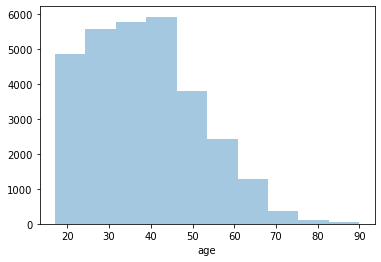

In [125]:
# Data visualisation 
sns.distplot(df2['age'], bins=10, kde=False)

So, most of the people are in age group 20-45. (mostly young people)

C:\Users\psoms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='age'>

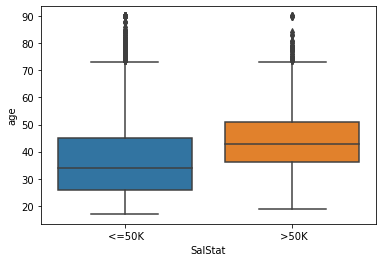

In [126]:
sns.boxplot('SalStat', 'age', data=df2)

In [127]:
df2.groupby('SalStat')['age'].median()

SalStat
 <=50K    34.0
 >50K     43.0
Name: age, dtype: float64

So, people with age 25-35, more likley to earn <=50K

whereas people with age 35-50, more likley to earn >50K salary

C:\Users\psoms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain'>

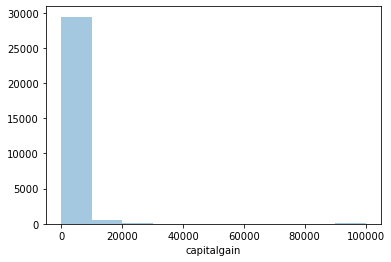

In [128]:
#Capital gain 

sns.distplot(df2['capitalgain'], bins=10, kde=False)

<AxesSubplot:xlabel='capitalloss'>

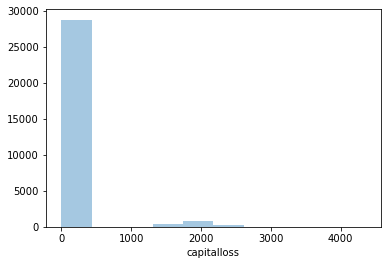

In [129]:
#Capital loss 

sns.distplot(df2['capitalloss'], bins=10, kde=False)

So, More than 90% entris in Capital gain and Capital Loss are Zero

C:\Users\psoms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='hoursperweek'>

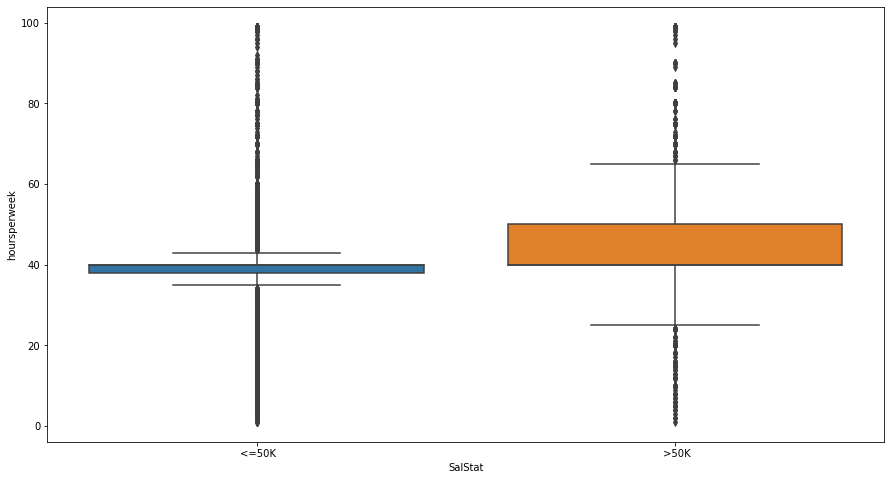

In [130]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.boxplot('SalStat', 'hoursperweek', data=df2)

From aboive it s clearly visible that those who make >50K are more likely to work 40-50 hours in a week

In [105]:
#Logistic Regression

In [131]:
df2['SalStat'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [132]:
#Reindexing the salary status names to 0 and 1

df2['SalStat']= df2['SalStat'].map({' <=50K':0, ' >50K':1})



C:\Users\psoms\AppData\Local\Temp\ipykernel_17244\3932391978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SalStat']= df2['SalStat'].map({' <=50K':0, ' >50K':1})


In [133]:
df2['SalStat'].unique()

array([0, 1], dtype=int64)

In [135]:
#creating Dummy variables
new_data=pd.get_dummies(df2, drop_first=True)

In [139]:
#storing the columns names

columns=list(new_data.columns)
#columns

In [140]:
#separating the input column names from data
features= list(set(columns) - set(['SalStat']))
#features

In [143]:
# Storing the output values in y

y=new_data['SalStat'].values


In [144]:
#storing the input features

x=new_data[features].values


In [145]:
x.shape

(30162, 94)

In [146]:
y.shape

(30162,)

## Logistic Regression

In [157]:
#importing libraries for Logistic regression, train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing


In [158]:
scaler = preprocessing.StandardScaler().fit(x)
x_scaled = scaler.transform(x)

In [159]:
#Spliting the variables in to train test 

train_x, test_x, train_y, test_y = train_test_split(x_scaled, y, test_size=0.3, random_state=99)


In [160]:
train_x.shape, train_y.shape

((21113, 94), (21113,))

In [161]:
test_x.shape, test_y.shape

((9049, 94), (9049,))

In [162]:
# Model instance
lreg= LogisticRegression()

In [163]:
#fitting for x y training data

lreg.fit(train_x, train_y)


LogisticRegression()

In [164]:
lreg.coef_

array([[-8.43520779e-02, -2.62477997e-02,  6.25900926e-02,
        -2.05132755e-01, -7.02932746e-02,  6.88106761e-01,
        -2.95669406e-01,  1.34637977e-02, -9.01654046e-03,
        -2.88869556e-02, -8.81758485e-02, -6.83572965e-02,
        -1.64967044e-02,  1.69662399e-01, -4.71381883e-01,
        -4.95366921e-02,  2.67215774e-01, -8.01631141e-02,
        -1.20029373e-01, -2.67227513e-02, -3.23841444e-02,
        -1.51139555e-01,  7.47537122e-02, -2.64706887e-01,
         7.32245034e-02, -1.83386571e-01, -2.46559370e-01,
        -3.66643273e-02,  4.12200166e-01, -8.27336414e-02,
         4.25603409e-01, -5.41212695e-02, -8.42820147e-02,
        -3.92667860e-01, -1.60956024e-01, -5.54899457e-02,
        -2.38110312e-01, -1.32833279e-01, -3.17309642e-02,
        -3.45667905e-02, -1.94919349e-01,  1.22751263e-01,
        -2.84678900e-02,  1.35938705e-02, -1.75420563e-01,
        -3.43580175e-02,  2.32822317e+00,  3.32772645e-01,
         8.51610124e-02,  1.21464438e-02, -2.36411958e-0

In [165]:
lreg.intercept_

array([-2.06238319])

In [167]:
y_pred=lreg.predict(test_x)

In [168]:
#confusion Matrix to evaluate performace of Logistics regression

conf_mat= confusion_matrix(test_y, y_pred)
conf_mat


array([[6326,  487],
       [ 921, 1315]], dtype=int64)

In [170]:
# Accuracy of Logistic Regression
acc_score=accuracy_score(test_y, y_pred)
acc_score

0.8444026964305448

In [171]:
#printing the misclassified values from prediction

print('Misclassified samples are : %d' %(test_y != y_pred).sum())

Misclassified samples are : 1408


## Logistic Regresion by removing Insignificant variables



In [193]:
#df2

In [173]:
cols= ['JobType', 'race','gender','nativecountry' ]

In [174]:
new_data2=df2.drop(cols, axis=1)

In [175]:
#creating Dummy variables
new_data2=pd.get_dummies(new_data2, drop_first=True)

In [176]:
#storing the columns names

columns=list(new_data2.columns)

In [177]:
#separating the input column names from data
features= list(set(columns) - set(['SalStat']))


In [178]:
# Storing the output values in y

y=new_data2['SalStat'].values


In [179]:
#storing the input features

x=new_data2[features].values


In [180]:
#scaling of data

scaler = preprocessing.StandardScaler().fit(x)
x_scaled = scaler.transform(x)

In [181]:
# train test split
train_x, test_x, train_y, test_y = train_test_split(x_scaled, y, test_size=0.3, random_state=99)

In [182]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((21113, 43), (21113,), (9049, 43), (9049,))

In [183]:
# Model instance
lreg2= LogisticRegression()

In [184]:
#fitting for x y training data

lreg2.fit(train_x, train_y)

LogisticRegression()

In [185]:
lreg2.coef_

array([[ 0.34633398,  0.07374527,  0.06781801,  0.01050962,  0.21293546,
        -0.06680391,  0.69248471,  0.00924802, -0.3154165 , -0.01614611,
        -0.01074274, -0.05463227,  0.25914819, -0.13815768,  0.14659238,
         0.30605414, -0.46847241,  0.26472732, -0.07666536,  0.07550319,
         0.32920854, -0.09328656,  0.06945664, -0.02749182, -0.10182086,
        -0.21568701,  0.41540396, -0.24960178, -0.49355682,  0.34818607,
        -0.1842338 ,  0.00320257, -0.14555101,  0.0179546 , -0.15145041,
         2.31666339,  0.09504029,  0.36456517,  1.0431672 ,  0.2722584 ,
         0.48609764, -0.03415858,  0.10116119]])

In [187]:
lreg2.intercept_

array([-1.98966925])

In [189]:
y_pred=lreg2.predict(test_x)

In [190]:
conf_mat= confusion_matrix(test_y, y_pred)
conf_mat


array([[6323,  490],
       [ 930, 1306]], dtype=int64)

In [191]:
# Accuracy of Logistic Regression with reduced features
acc_score=accuracy_score(test_y, y_pred)
acc_score

0.8430765830478506

In [192]:
#printing the misclassified values from prediction

print('Misclassified samples (reduced feature Logistic Regression) are : %d' %(test_y != y_pred).sum())

Misclassified samples (reduced feature Logistic Regression) are : 1420


Since with reduced features also, the Accuracy remains same. So we will keep this as our final model

## K- Nearest Neighbour  (KNN) Model

In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [196]:
# Storing the K nearest neighbors
KNN_classifier= KNeighborsClassifier(n_neighbors= 5)

In [197]:
#fitting training values

KNN_classifier.fit(train_x, train_y)

KNeighborsClassifier()

In [198]:
#predicting the test values with model

y_pred= KNN_classifier.predict(test_x)

In [199]:
#performance matrix check
conf_mat= confusion_matrix(test_y, y_pred)
conf_mat


array([[6133,  680],
       [ 988, 1248]], dtype=int64)

In [200]:
# Accuracy Score 
acc_score=accuracy_score(test_y, y_pred)
acc_score


0.8156702398055033

In [201]:
#printing the misclassified values from prediction

print('Misclassified samples (reduced feature Logistic Regression) are : %d' %(test_y != y_pred).sum())

Misclassified samples (reduced feature Logistic Regression) are : 1668


In [204]:
## Effect of K value on classifier
accu_score=[]
Misclassified_sample=[]

for i in range (1,20):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(train_x, train_y)
    pred_i= knn.predict(test_x)
    acc_score=accuracy_score(test_y, pred_i)
    accu_score.append(acc_score)
    Misclassified_sample.append((test_y != pred_i).sum())




In [205]:
print (accu_score)

[0.7993148414189413, 0.8129075035915571, 0.8153387114598298, 0.8173278815338711, 0.8156702398055033, 0.8216377500276274, 0.8190960327107968, 0.819648579953586, 0.8211957122333959, 0.819648579953586, 0.8209746933362803, 0.8194275610564703, 0.8199801082992596, 0.8183224665708918, 0.8184329760194496, 0.8168858437396398, 0.8188750138136811, 0.8206431649906067, 0.820422146093491]


In [206]:
print (Misclassified_sample)

[1816, 1693, 1671, 1653, 1668, 1614, 1637, 1632, 1618, 1632, 1620, 1634, 1629, 1644, 1643, 1657, 1639, 1623, 1625]


So, at k =6 , we are getting lowest Missclasified samples (1614) and accuracy of 82.16%